# Date Extraction & Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_set = pd.read_csv("dataset.csv")

In [3]:
data_set.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [4]:
data_set['I-E'] = data_set['type'].apply(lambda x: 1 if x[0] == 'I' else 0)
data_set['N-S'] = data_set['type'].apply(lambda x: 1 if x[1] == 'N' else 0)
data_set['F-T'] = data_set['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
data_set['P-J'] = data_set['type'].apply(lambda x: 1 if x[3] == 'P' else 0)
data_set.drop(['type'],axis=1,inplace=True)

In [5]:
personality=dict()

personality['I-E']=['Introversion (I)', 'Extraversion (E)']
personality['N-S']=['Intuition (N)', 'Sensing (S)']
personality['F-T']=['Feeling (F)', 'Thinking (T)']
personality['P-J']=['Perceiving (P)', 'Judging (J)']

In [6]:
data_set.head()

posts  I-E  N-S  F-T  P-J
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...    1    1    1    0
1  'I'm finding the lack of me in these posts ver...    0    1    0    1
2  'Good one  _____   https://www.youtube.com/wat...    1    1    0    1
3  'Dear INTP,   I enjoyed our conversation the o...    1    1    0    0
4  'You're fired.|||That's another silly misconce...    0    1    0    0

In [7]:
data_set['I-E'].value_counts()

I-E
1    6676
0    1999
Name: count, dtype: int64

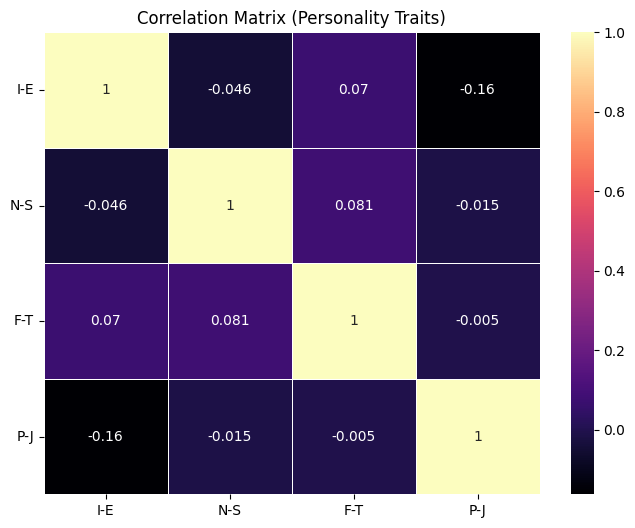

In [8]:
corr = data_set[['I-E','N-S','F-T','P-J']].corr()
corr = corr.round(3)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='magma', linewidths=0.5, yticklabels=True)
plt.title('Correlation Matrix (Personality Traits)')
plt.yticks(rotation=0)  
plt.show()


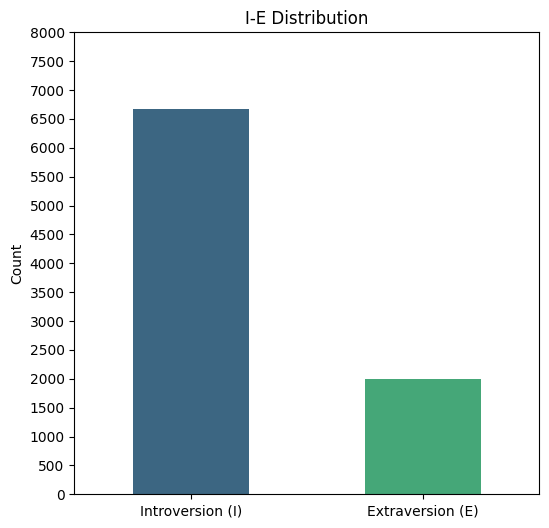

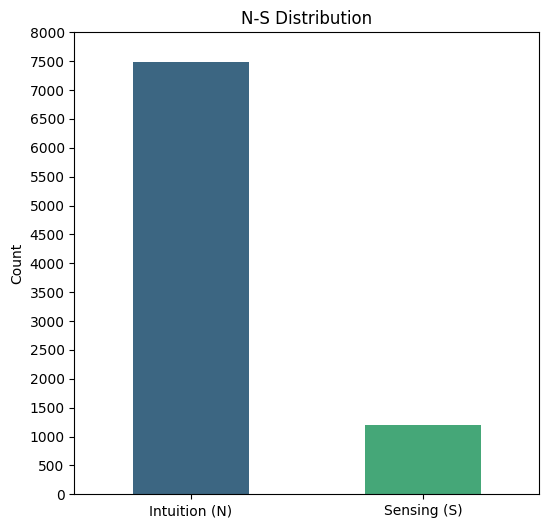

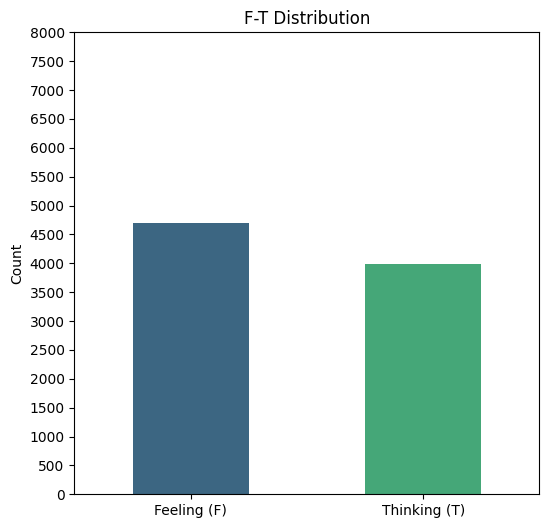

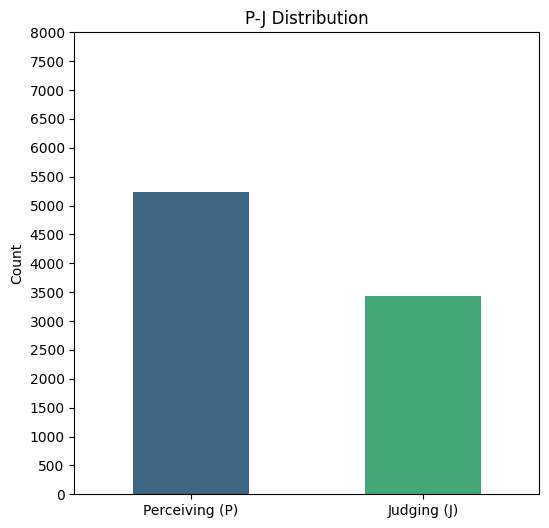

In [10]:
def trait_distribution(trait):
    plt.figure(figsize=(6, 6))
    sns.barplot(x=personality[trait], y=data_set[trait].value_counts().values,width=0.5, palette='viridis')
    plt.title(trait+' Distribution')
    plt.yticks(range(0, 8500, 500))
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

trait_distribution('I-E')
trait_distribution('N-S')
trait_distribution('F-T')
trait_distribution('P-J')

# Data Preprocessing

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


lemmatiser = WordNetLemmatizer()
useless_words = stopwords.words("english")
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

In [11]:
import re
import numpy as np



def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_posts = []
  
  for row in data.iterrows():

      posts = row[1].posts
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
      temp = re.sub("[^a-zA-Z]", " ", temp)
      temp = re.sub(' +', ' ', temp).lower()
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")
      list_posts.append(temp)

  list_posts = np.array(list_posts)

  return list_posts


list_posts  = pre_process_text(data_set, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data_set.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])

Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [12]:
data_set['posts'] = list_posts

In [13]:
# make a word cloud for the posts
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def createWordCloud(data,trait,type,):
    subset = data[data[trait]==type]
    text = subset.posts.values
    cloud = WordCloud(background_color='white',max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(text))
    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(cloud)
    file_name = personality[trait][type]+".png"
    plt.savefig(file_name,bbox_inches='tight')


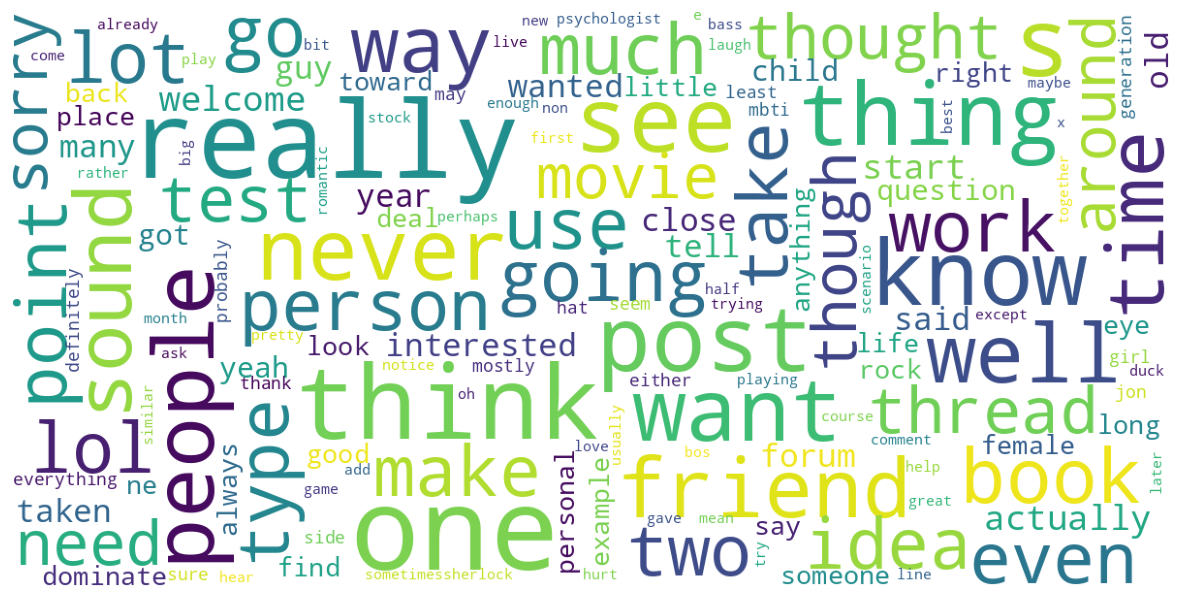

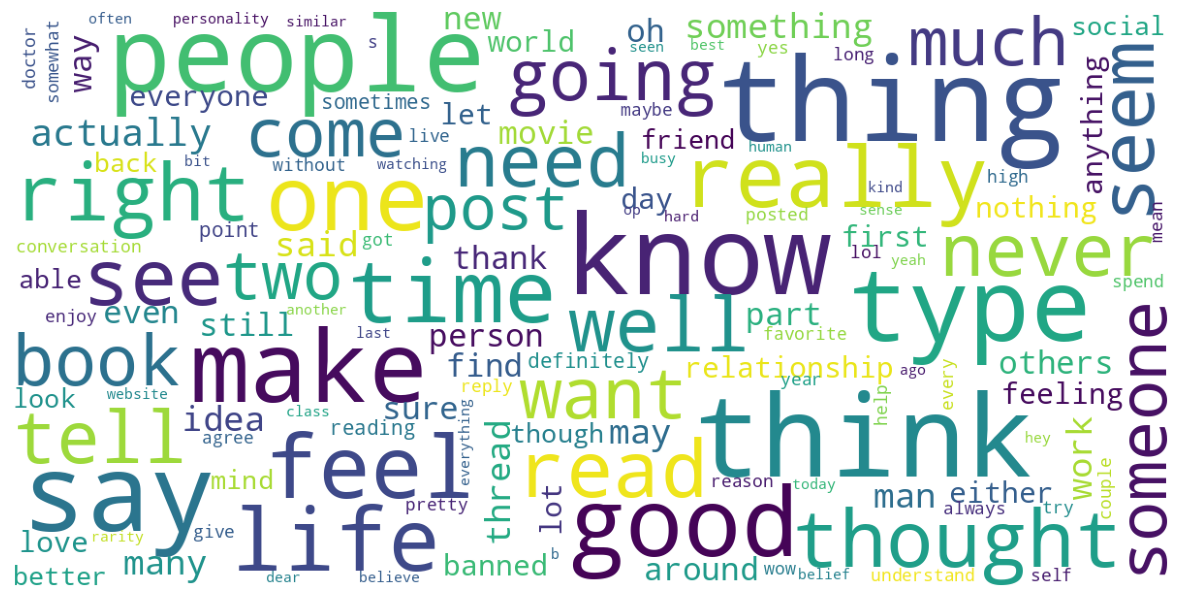

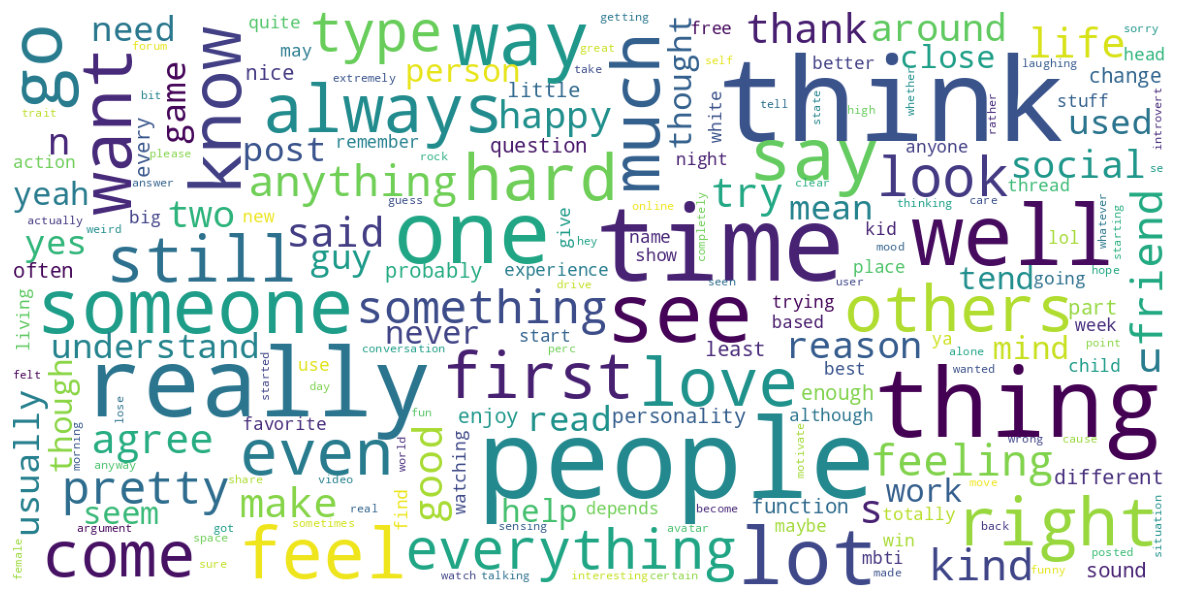

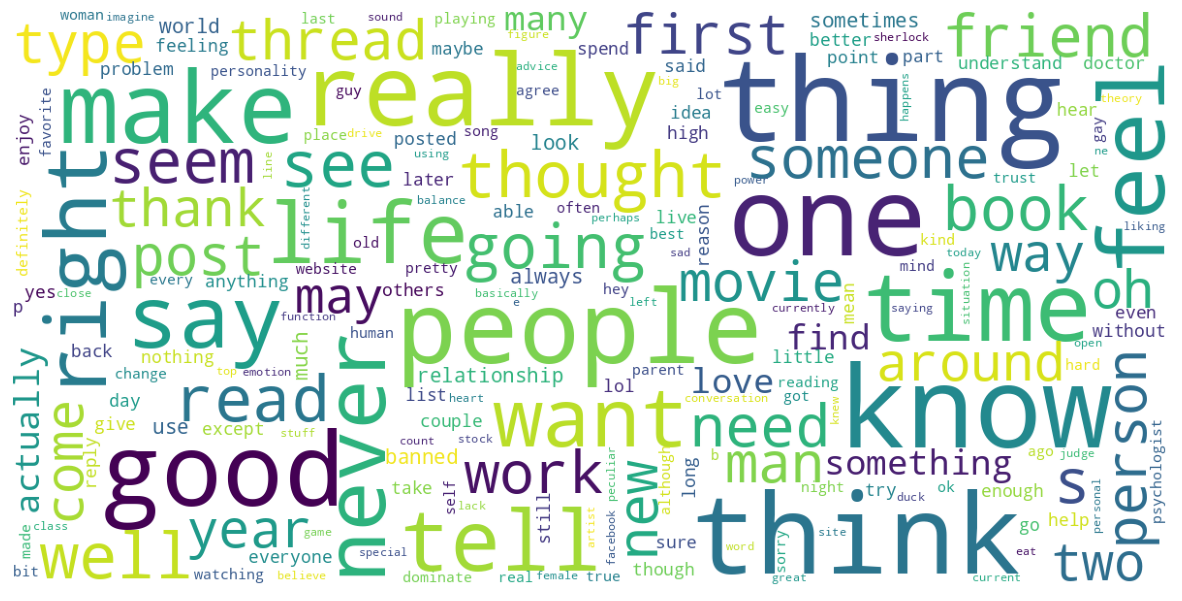

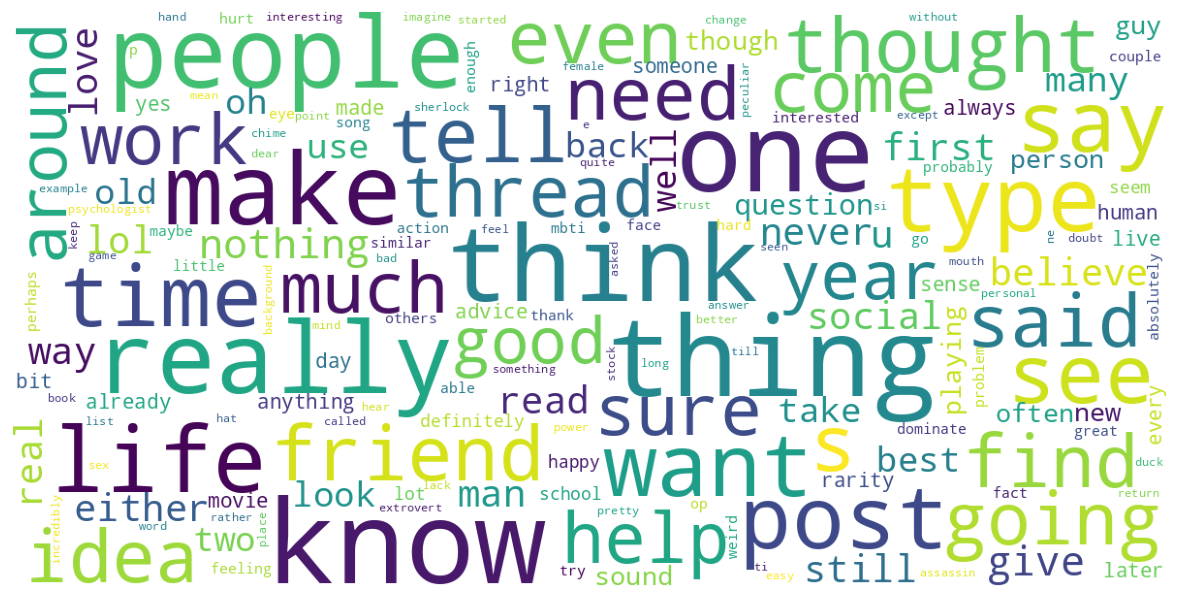

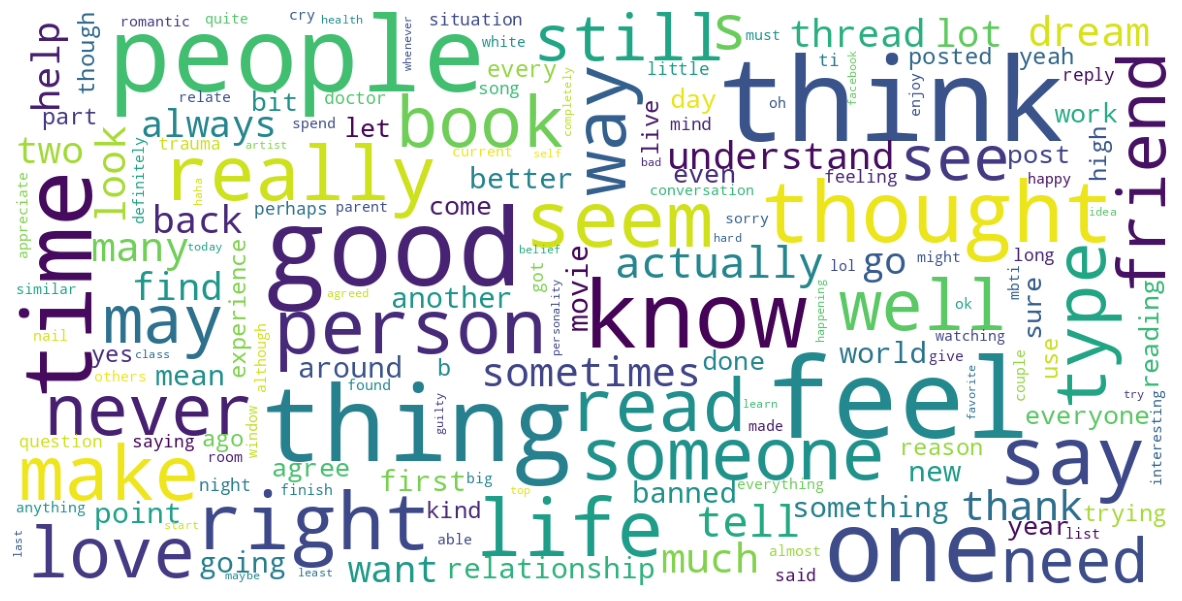

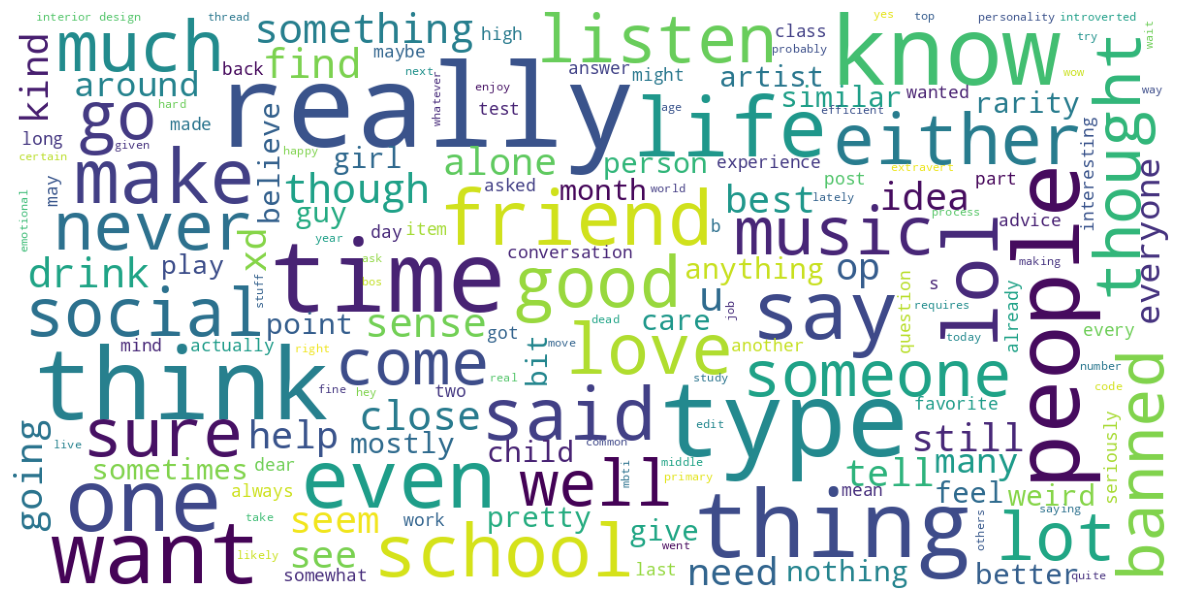

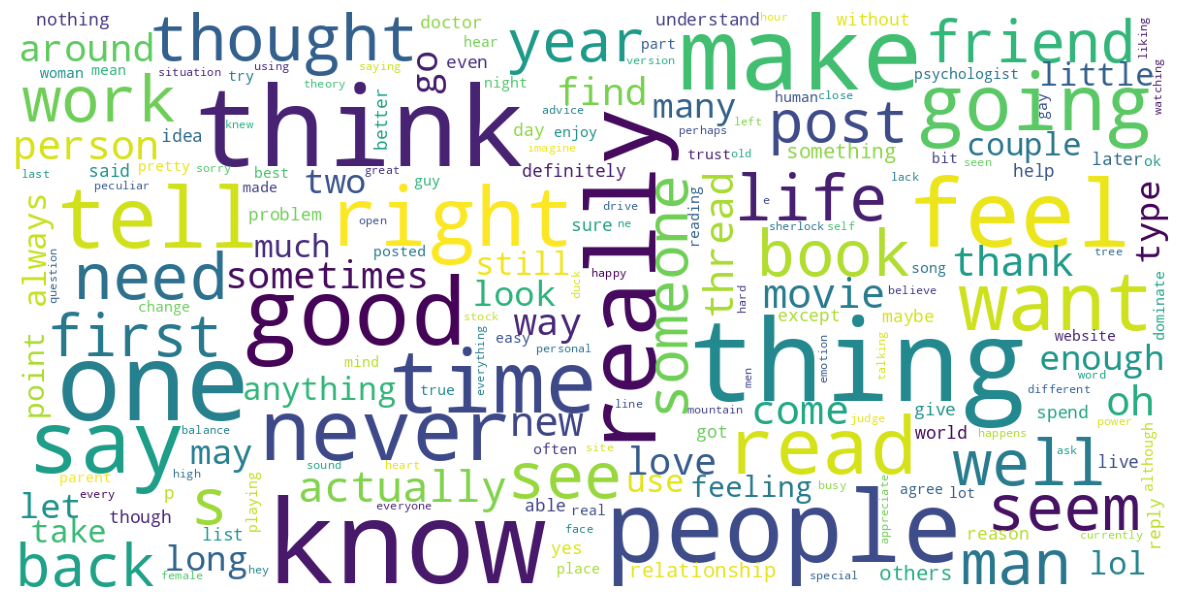

In [14]:
createWordCloud(data_set,'I-E',0)
createWordCloud(data_set,'I-E',1)
createWordCloud(data_set,'N-S',0)
createWordCloud(data_set,'N-S',1)
createWordCloud(data_set,'F-T',0)
createWordCloud(data_set,'F-T',1)
createWordCloud(data_set,'P-J',0)
createWordCloud(data_set,'P-J',1)

# Text Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             min_df=0.1) 

print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:20])


tfizer = TfidfTransformer()
print("\nUsing Tf-idf :")
print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid'), (10, 'age'), (11, 'ago'), (12, 'agree'), (13, 'almost'), (14, 'alone'), (15, 'along'), (16, 'already'), (17, 'also'), (18, 'although'), (19, 'always')]

Using Tf-idf :
Now the dataset size is as below
(8675, 607)


In [16]:
df = pd.DataFrame(X_tfidf, columns=cntizer.get_feature_names_out())
df['I-E'] = data_set['I-E']
df['N-S'] = data_set['N-S']
df['F-T'] = data_set['F-T']
df['P-J'] = data_set['P-J']

In [17]:
df.head()

ability      able  absolutely  across  act    action  actually  add  \
0      0.0  0.000000    0.000000     0.0  0.0  0.000000  0.000000  0.0   
1      0.0  0.044616    0.000000     0.0  0.0  0.000000  0.000000  0.0   
2      0.0  0.099997    0.118436     0.0  0.0  0.000000  0.000000  0.0   
3      0.0  0.089551    0.000000     0.0  0.0  0.112155  0.060847  0.0   
4      0.0  0.000000    0.000000     0.0  0.0  0.000000  0.055639  0.0   

     advice  afraid  ...      yeah      year       yes  yet  young  younger  \
0  0.000000     0.0  ...  0.000000  0.046383  0.000000  0.0    0.0      0.0   
1  0.050597     0.0  ...  0.000000  0.029774  0.000000  0.0    0.0      0.0   
2  0.000000     0.0  ...  0.000000  0.200194  0.070157  0.0    0.0      0.0   
3  0.000000     0.0  ...  0.037627  0.000000  0.000000  0.0    0.0      0.0   
4  0.000000     0.0  ...  0.000000  0.000000  0.057450  0.0    0.0      0.0   

   I-E  N-S  F-T  P-J  
0    1    1    1    0  
1    0    1    0    1  
2    1    1    0    1  
3    1    1    0    0  
4    0    1    0    0  

[5 rows x 611 columns]

# Model Training & Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['I-E','N-S','F-T','P-J'], axis=1), df[['I-E','N-S','F-T','P-J']], test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


def SVM_Pipeline(X_train,y_train,X_test,y_test,y_pred_column,score_accuracy,score_f1):
        
    model=SVC( kernel='rbf', probability=True)
    y_train=y_train[y_pred_column]
    y_test=y_test[y_pred_column]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    score_accuracy[y_pred_column].append(accuracy_score(y_test,y_pred).round(3))
    score_f1[y_pred_column].append(f1_score(y_test,y_pred))


def LogisticRegression_Pipeline(X_train,y_train,X_test,y_test,y_pred_column,score_accuracy,score_f1):
    
    model=LogisticRegression()
    y_train=y_train[y_pred_column]
    y_test=y_test[y_pred_column]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    score_accuracy[y_pred_column].append(accuracy_score(y_test,y_pred).round(3))
    score_f1[y_pred_column].append(f1_score(y_test,y_pred))

In [20]:
score_accuracy_SVM = dict()
score_f1_SVM = dict()
score_accuracy_LR = dict()
score_f1_LR = dict()

for trait in ['I-E','N-S','F-T','P-J']:
    score_accuracy_SVM[trait] = []
    score_f1_SVM[trait] = []
    score_accuracy_LR[trait] = []
    score_f1_LR[trait] = []

In [21]:
SVM_Pipeline(X_train,y_train,X_test,y_test,'I-E',score_accuracy_SVM,score_f1_SVM)
SVM_Pipeline(X_train,y_train,X_test,y_test,'N-S',score_accuracy_SVM,score_f1_SVM)
SVM_Pipeline(X_train,y_train,X_test,y_test,'F-T',score_accuracy_SVM,score_f1_SVM)
SVM_Pipeline(X_train,y_train,X_test,y_test,'P-J',score_accuracy_SVM,score_f1_SVM)

In [22]:
def metric_bar_plot(score, title):
    plt.figure(figsize=(5, 5))
    
    sns.barplot(x=list(personality.keys()), y=[score[trait][0] for trait in personality.keys()], width=0.6,palette='viridis')
    for i in range(len(personality.keys())):
        plt.text(x = i-0.15 , y = score[list(personality.keys())[i]][0]+0.015, s = round(score[list(personality.keys())[i]][0], 2), size = 10)
    
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=0)
    plt.xlabel('Personality Traits')
    plt.show()



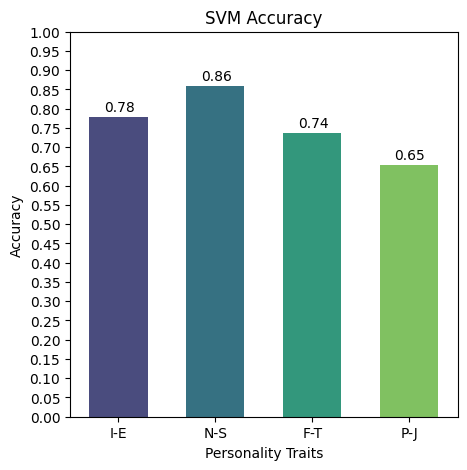

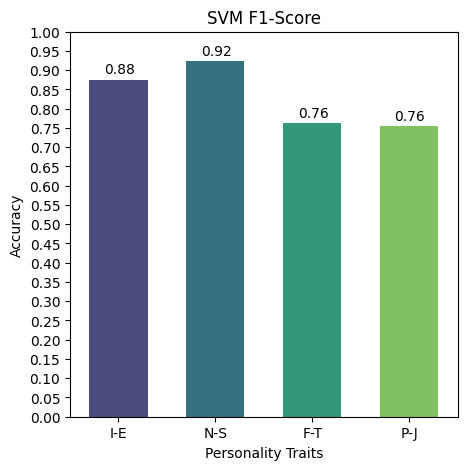

In [23]:
metric_bar_plot(score_accuracy_SVM, 'SVM Accuracy')
metric_bar_plot(score_f1_SVM, 'SVM F1-Score')


In [24]:
LogisticRegression_Pipeline(X_train,y_train,X_test,y_test,'I-E',score_accuracy_LR,score_f1_LR)
LogisticRegression_Pipeline(X_train,y_train,X_test,y_test,'N-S',score_accuracy_LR,score_f1_LR)
LogisticRegression_Pipeline(X_train,y_train,X_test,y_test,'F-T',score_accuracy_LR,score_f1_LR)
LogisticRegression_Pipeline(X_train,y_train,X_test,y_test,'P-J',score_accuracy_LR,score_f1_LR)

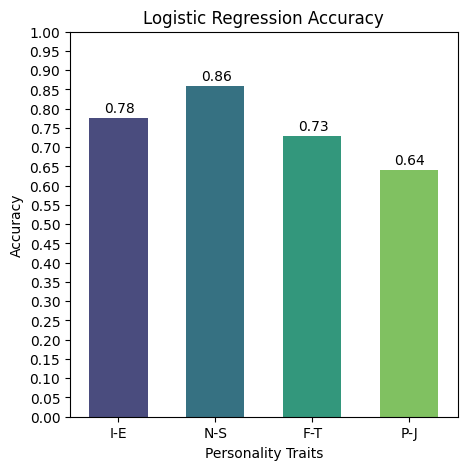

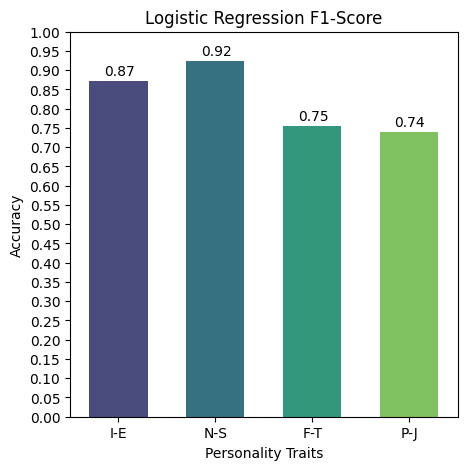

In [25]:
metric_bar_plot(score_accuracy_LR, 'Logistic Regression Accuracy')
metric_bar_plot(score_f1_LR, 'Logistic Regression F1-Score')